# Reverse Image Search

In [74]:
#importing the necessary libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
#What is reverse image search?

In [77]:
#Reverse image search is a search engine technology that takes an image file as input query and returns results 
#related to the image.

#Search engines that offer reverse image capability include Google and TinEye. 
#Some websites, such as Reddit, also provide a reverse image search capacity.

In [78]:
train_path ='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Reverse Image Search\\train_zip\\train\\'
test_path ='D:\\M. Tech in Data Science & Machine Learning\\Deep Learning\\Reverse Image Search\\test_zip\\test\\'

In [79]:
import os#OS module in Python provides functions for interacting with the operating system.
import cv2#OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

In [80]:
train_labels=[]#empty list for the train labels
train_images=[]#empty list for train images
for i in os.listdir(train_path):#i is the filename of the image
    if i.split('.')[1] == 'jpg':
        #we have two types of files in the images folders xml and jpg
        #as we need only jpg, we are splitting the image name and extension and if the extension matches with jpg than only
        img=cv2.imread(train_path+i)#joining the full path and the file name (to create individual location for the image)
        img=cv2.resize(img,(150,150))#Resize the images 
        train_images.append(img)#appending to the list of train images
        train_labels.append(i.split('_')[0])#appending only the category name for example like "Apple", "Banana"

In [81]:
#converting the image into array

In [82]:
train_images = np.array(train_images)

In [83]:
#checking the number of labels and Converting labels into One Hot encoded 

In [84]:
train_label_set = set(train_labels)#by converting to set we get only the unique items as set dosent take duplicates
print(train_label_set)

{'mixed', 'apple', 'banana', 'orange'}


In [85]:
#in total we have 4 categories that are 'apple', 'orange', 'banana', 'mixed fruits'

In [86]:
train_labels=pd.get_dummies(train_labels).values
train_labels[1:5]#printing some records

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [87]:
#Applying Train test split for Train and validation set

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_val, Y_train , Y_val = train_test_split(train_images, train_labels, random_state=2)

In [90]:
#similary perfrorming the same on test data

In [91]:
test_labels=[]#empty list for the test labels
test_images=[]#empty list for test images
for j in os.listdir(test_path):#i is the filename of the image
    if j.split('.')[1] == 'jpg':
        #we have two types of files in the images folders xml and jpg
        #as we need only jpg, we are splitting the image name and extension and if the extension matches with jpg than only
        img=cv2.imread(test_path+j)#joining the full path and the file name (to create individual location for the image)
        img=cv2.resize(img,(150,150))#Resize the images 
        test_images.append(img)#appending to the list of train images
        test_labels.append(j.split('_')[0])#appending only the category name for example like "Apple", "Banana"

In [92]:
#converting the image into array

In [93]:
test_images = np.array(test_images)

In [94]:
#checking the number of labels and Converting labels into One Hot encoded 

In [95]:
test_label_set = set(test_labels)#by converting to set we get only the unique items as set dosent take duplicates
print(test_label_set)

{'mixed', 'apple', 'banana', 'orange'}


In [96]:
#in total we have 4 categories that are 'apple', 'orange', 'banana', 'mixed fruits'

In [97]:
test_labels=pd.get_dummies(test_labels).values
test_labels[1:5]#printing some records

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [98]:
#Model Building

In [129]:
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten ,Input

In [109]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=30,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=30,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=30,kernel_size=(3,3),activation='relu'))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(25,activation='relu'))
model1.add(Dense(20,activation='relu'))
model1.add(Dense(15,activation='relu'))
model1.add(Dense(4,activation='softmax'))

In [110]:
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 30)        8670      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 30)        8130      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 30)       

In [111]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [112]:
M1=model1.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=30,epochs=20,verbose=1)

Epoch 1/20
6/6 [==============================] - 10s 943ms/step - loss: 19.7923 - accuracy: 0.2316 - val_loss: 1.7896 - val_accuracy: 0.2333
Epoch 2/20
6/6 [==============================] - 4s 721ms/step - loss: 2.3107 - accuracy: 0.2795 - val_loss: 1.0491 - val_accuracy: 0.5833
Epoch 3/20
6/6 [==============================] - 5s 816ms/step - loss: 1.2155 - accuracy: 0.5167 - val_loss: 1.2865 - val_accuracy: 0.4333
Epoch 4/20
6/6 [==============================] - 4s 748ms/step - loss: 1.1708 - accuracy: 0.4057 - val_loss: 1.1098 - val_accuracy: 0.5667
Epoch 5/20
6/6 [==============================] - 5s 790ms/step - loss: 1.1011 - accuracy: 0.5660 - val_loss: 0.8936 - val_accuracy: 0.7167
Epoch 6/20
6/6 [==============================] - 5s 805ms/step - loss: 0.7641 - accuracy: 0.6732 - val_loss: 0.5590 - val_accuracy: 0.8333
Epoch 7/20
6/6 [==============================] - 5s 786ms/step - loss: 0.6320 - accuracy: 0.8448 - val_loss: 0.5665 - val_accuracy: 0.8167
Epoch 8/20
6/6 [==

In [113]:
#From the model performance we can see that Training accuracy of the model is 92% and validation accuracy is 71%
#also as loss 0.23 which is less we can say that the above model is good

In [115]:
model1.evaluate(test_images,test_labels)

2/2 [==============================] - 0s 149ms/step - loss: 1.5999 - accuracy: 0.7000


[1.5998685359954834, 0.699999988079071]

In [116]:
#Model evaluation testing accuracy is 70%

In [117]:
#Plotting the Performance

In [118]:
def plot_performance1(model):
    plt.figure(figsize=(10,5))
    plt.plot(model.history['accuracy'],'b',label='Train Accuracy')
    plt.plot(model.history['val_accuracy'],'y',label='Validation Accuracy')
    plt.legend()
    plt.title('Train and Validation accuracy vs Epochs')
    plt.show()

In [119]:
def plot_performance2(model):
    plt.figure(figsize=(10,5))
    plt.plot(model.history['loss'],'b--',label='Train loss')
    plt.plot(model.history['val_loss'],'y--',label='Validation loss')
    plt.legend()
    plt.title('Train and Validation loss vs Epochs')
    plt.show()

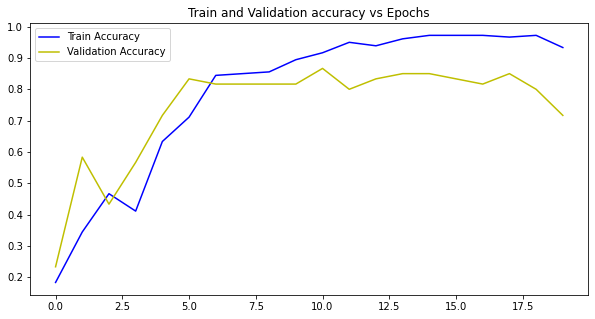

In [120]:
plot_performance1(M1)

In [121]:
#From the above plot we can see that Train accuracy and Validation accuracy are going hand in hand

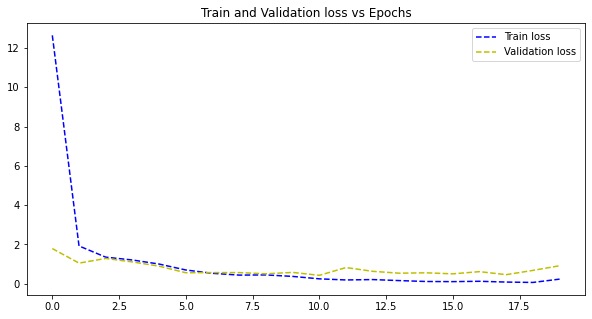

In [122]:
plot_performance2(M1)

In [123]:
#From the above plot we can see that Train loss and Validation loss are going hand in hand

In [124]:
#saving the model weights

In [126]:
model1.save('Model1.hdf5')

In [41]:
#Predicting on test image

In [42]:
#Lets select a randome image from test check the prediction

In [ ]:
#loading the saved weights

In [130]:
model_load=load_model('Model1.hdf5')

Actual :-  [[1 0 0 0]]
Predicted :-  apple


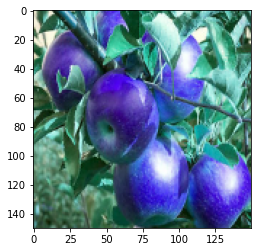

In [195]:
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model_load.predict(checkImage)

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}#creating a dictionary

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])
plt.imshow(test_images[0])# Visualizing Testing data
plt.show()

In [199]:
#Implementing Reverse image search

In [ ]:
#with the help K nearest neighbors we can find the nerest neighbours

In [133]:
#Prediction

In [164]:
from sklearn.neighbors import NearestNeighbors

In [169]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='auto',
                             metric='euclidean')#
neighbors.fit(model_predict)
#fitting the model

NearestNeighbors(metric='euclidean')

In [170]:
_, indices = neighbors.kneighbors(model_predict)
#Indices of the nearest points in the population matrix.

In [171]:
print(indices[56])#for example

[56 58 52 50 49]


In [ ]:
#to the indices 56 we have 58 52 50 49 which are similar.

Original Image


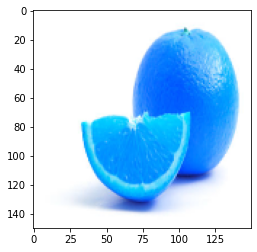

In [207]:
print('Original Image')
plt.imshow(test_images[56])
plt.show()

In [201]:
#function for displying the neighbours of the original image

In [202]:
def similar_images(indices):
    for index in indices:
        img1=test_images[index]
        plt.imshow(img1)
        plt.show()

In [203]:
#Similar Images to the original Images

In [ ]:
#1st example

Similar Images to the original Images:
[56 58 52 50 49]


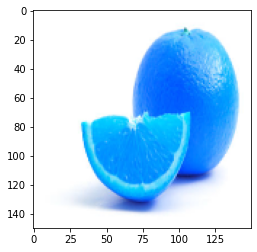

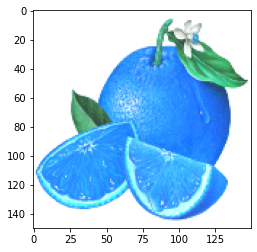

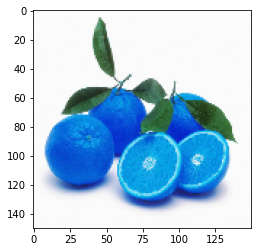

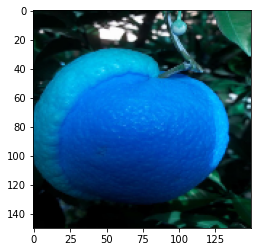

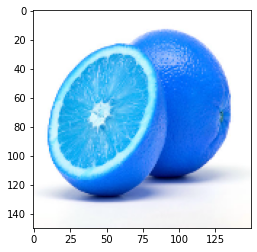

In [204]:
print('Similar Images to the original Images:')
print(indices[56])
similar_images(indices[56])

In [205]:
#2nd example

Original Image


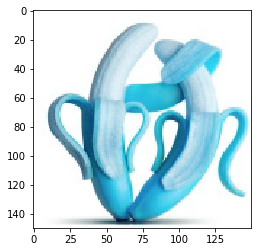

In [211]:
print('Original Image')
plt.imshow(test_images[20], interpolation='nearest')
plt.show()

Similar Images to the original Images:
[20 21 19 27 22]


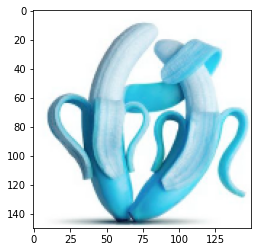

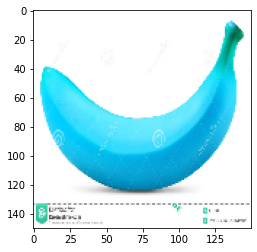

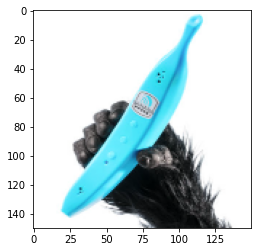

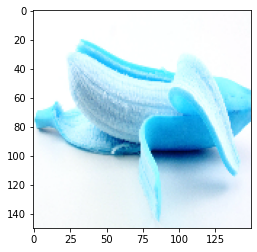

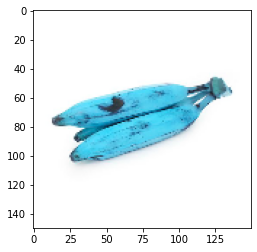

In [212]:
print('Similar Images to the original Images:')
print(indices[20])
similar_images(indices[20])

In [ ]:
#3rd example

Original Image


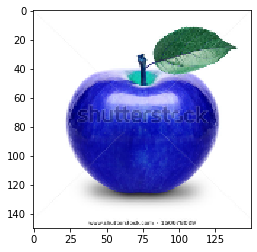

In [221]:
print('Original Image')
plt.imshow(test_images[5], interpolation='nearest')
plt.show()

Similar Images to the original Images:
[ 5 13 17 10  1]


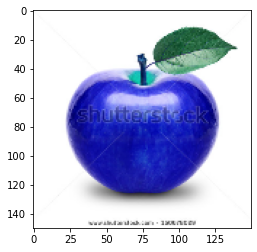

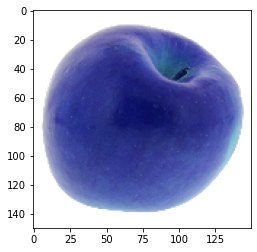

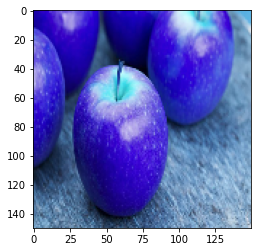

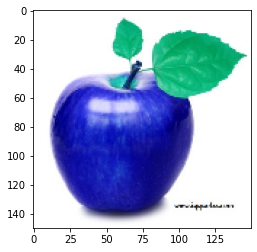

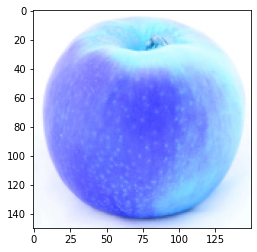

In [222]:
print('Similar Images to the original Images:')
print(indices[5])
similar_images(indices[5])

In [ ]:
#---------------------------------------END----------------------------------------------------------------------------#